<a href="https://colab.research.google.com/github/yudhiesh1997/Optimisation-Deep-Learning/blob/master/DNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import *

TensorFlow is already loaded. Please restart the runtime to change versions.


In [49]:
# Step 1 Data Processing
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [50]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [51]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [52]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_53 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 10)              

In [58]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(256,activation='tanh'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='sigmoid'),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.9224 - val_loss: 0.1265 - val_accuracy: 0.9631
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9713 - val_loss: 0.0877 - val_accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9807 - val_loss: 0.0935 - val_accuracy: 0.9725
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9862 - val_loss: 0.0802 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9887 - val_loss: 0.1101 - val_accuracy: 0.9718
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0853 - val_accuracy: 0.9763
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9921 - val_loss: 0.0769 - val_accuracy: 0.9796
Epoch 

## Visualization with Keras

In [59]:
def plot_(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

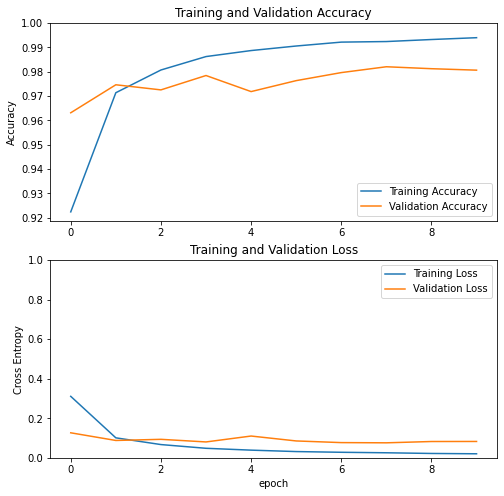

In [60]:
plot_(history)